# Ejercicio 2 - Comparación de Modelos de Clasificación

Este ejercicio se centra en el entrenamiento y evaluación de modelos de clasificación supervisada, sobre un conjunto de datos de campañas de marketing de productos bancarios. 

## Contexto: Análisis de éxito en campaña de marketing

Fuente: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

El foco está en la implementación de varios clasificadores para predicir el valor de un atributo, desde un *dataset* de información de un resultados de personas contactadas por una campaña de marketing y que compraron la oferta (atributo "OK"), con cerca de 41.200 registros de personas contactadas.

Este conjunto de datos (abierto para este tipo de usos instruccionales), consiste en 20 atributos y 1 clase de etiquetas (totalizando 21 columnas) y corresponde a los datos de una campaña telefónica a diversos clientes en Portugal, ofreciéndoles la compra de un producto bancario. En varios casos, un cliente fue contactado varias veces antes de aceptar el el depósito a plazo ofrecido por la campaña (OK = yes). 

Algunos de los atributos relevantes son (combinando atributos categóricos, con numéricos):
* **Datos personales**: Edad, Ocupación, Estado Civil, Nivel de Educación.
* **Datos financieros**: Su casa tiene crédito hipotecario, default: si el crédito ha caído en quiebra; tiene un crédito de consumo.
* **Datos de contactos de la campaña actual**: Tipo de Comunicación (celular o teléfono fijo); Mes del último contacto; Día de la semana del contacto; duración de la llamada (segundos); Contacto: N° de contactos durante la campaña; DíasAtrás: días transcurridos desde último contacto; Resultado: resultado de la última llamada (falló, no-existe, éxito)
* **Datos socioeconómicos**: EmpTasaVar: tasa de variación de empleabilidad; IPC: índice de precios consumidor mensual; ICC: índice de confianza consumidor mensual; Euribor3m: tasa euribor de 3 meses indicador diario; NumEmpleados: cantidad de gente empleada, en indicador trimestral. 

Esta adaptación en particular, por el equipo de R:Solver (RSolver.com), enfrenta diferentes objetivos de aprendizaje dentro de los cursos de Big Data y Machine Learning.



## Instrucciones Generales
En este caso, se busca entender el comportamiento y desempeño de diferentes modelos de clasificación sobre este conjunto de datos, para predecir la variable de interés: **OK**, que servirá para predecir en casos futuros, según los datos de contactabilidad de un cliente, si el cliente aceptará o no contratar el depósito a plazo.

Todos los alumnos, ya sea en grupo, o individualmente (si no tienen compañeros), deben contestar las preguntas que se indican en las secciones de "Preguntas", más adelante. Se puede recurrir a ejercicios de otras fuentes, así como al material de clases.

El formato del email es:

To: rsandova@ing.puc.cl

Subject: Fundamentos Machine Learning - (AÑO)(MES)(DÍA)    (por ej: Fundamentos Machine Learning - 20210820)

Integrantes (orden alfabético apellido): nombre apellido, nombre apellido, ...

Pregunta 1

*Se eliminaron las columnas ____, ____, ya que ...*

Pregunta 2

*(Tabla de datos de ejecuciones comparadas de los modelos y con diferentes proporciones de % entrenamiento-evaluación, así como indicando qué columna del dataset se eliminó, buscando mejorar el modelo)*

*De la tabla anterior, se determina que el mejor desempeño de modelo es _________ usando una proporción de __________ para entrenamiento y __ para test y habiendo eliminado la columna ______. Esto se ve gracias al (los) indicador(es) _________*

Pregunta 3

*Se estima que el mejor modelo XXXXXXX tuvo ese desempeño, debido a que ______*

**Nota: sólo se aceptan e-mails con todo el contenido (tablas, respuestas) en el cuerpo del e-mail, o alternativamente en forma de un informe lo más breve y conciso posible, en formato PDF.**



## Paso 1: Instalar las librerías de modelos de clasificación

Esto se ejecuta sólo una vez al comienzo de la sesión de cada persona. No se necesita volver a ejecutar con cada nueva prueba del resto de los scripts.

In [ ]:
install.packages('e1071')
install.packages('caret')
install.packages('rpart')
install.packages('rpart.plot')
install.packages('randomForest')
install.packages("nnet")
install.packages('class')
install.packages('Hmisc')

#Incorporación de Semilla 
set.seed(1234)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘png’, ‘jpeg’, ‘checkmate’, ‘htmlwidgets’, ‘Formula’, ‘latticeExtra’, ‘gridExtra’, ‘htmlTable’, ‘viridis’




## Paso 2: Carga y preparación de los datos

La siguiente celda de código, carga los datos desde la URL de origen y luego preprocesa la información, realizando actividades de limpieza del dataset, además de balancer clases y prepara conjuntos de entrenamiento y evaluación.

Esto también puede ser ejecutado una sola vez, si es conveniente.

In [ ]:
# Se declara la URL de dónde obtener los datos
theUrlMain <- "http://www.rsolver.com/dcc/docs/bank-additional-full.csv"

# Se declaran los nombres de las columnas
columnas = c("Edad","Ocupación","EstadoCivil","Educación","Default","Hipotecario","Consumo","Contacto","Mes","Día",
             "Duración","NumContactos","DíasAtrás","Previo","ResultadoPrevio",
             "EmpTasaVar", "IPC", "ICC", "Euribor3m", "NumEmpleados", "OK")

# Se cargan datos principales a una estructura o dataset (marketing.data), asignando nombres de atributos a las columnas.
# Nótese que se incluye la conversión de valores "unknown" a "NA" para facilitar la gestión vacíos más adelante.
marketing.data <- read.table(file = theUrlMain, header = TRUE, sep = ";", col.names = columnas, na.strings=c("unknown","NA"))

# Se eliminan los registros que tienen algún NA (antes: 'unknown')
marketing.clean <- na.omit(marketing.data)
dim(marketing.clean) # Sólo quedan poco más de 30.000 filas (de las 41.000 originales)

# Se muestran las primeras líneas del dataset, incluyendo nombres asignados a las columnas.
head(marketing.data, 20)
dim(marketing.data)

# Aquí se arman dos subconjuntos con los datos de cada una de las dos clases.
# Se pueden ver los respectivos tamaños al terminar, evidenciando un desbalance.
clean.data.YES <- marketing.clean[marketing.clean$OK == 'yes',]  
clean.data.NO <- marketing.clean[marketing.clean$OK == 'no',]
dim(clean.data.YES) # Se ve que este es el conjunto más pequeño
dim(clean.data.NO)

# Se balancean las clases para entrenar: se busca acercar la cantidad de ejemplos positivos, con los negativos.
# Para esto se puede definir la cantidad de ejemplos de la clase más abundante (NO)
# en una proporción (balance_ratio) de la cantidad de registros de la clase menos abundante (YES) 
# balance_ratio = 1.0 implica la misma cantidad para NO y para YES. Según haber probado, se puede elegir un número distinto de 1
balance_ratio <- 1.0  

clean.subdata.YES <- clean.data.YES  # No se aplica sample(): se usan todos los ejemplos de la clase OK (que es la que tiene menos ejemplos)
clean.subdata.NO <- clean.data.NO[sample(nrow(clean.data.NO), balance_ratio*dim(clean.data.YES)[1]), ]

# Muestra cantidad de ejemplos contenidos en cada subconjunto
dim(clean.subdata.YES)
dim(clean.subdata.NO)

# Se juntan para el conjunto de referencia, ahora más balanceado
clean.subdata <- rbind(clean.subdata.YES, clean.subdata.NO)

library(Hmisc)
describe(marketing.data)


[1] 30488    21

,Edad,Ocupación,EstadoCivil,Educación,Default,Hipotecario,Consumo,Contacto,Mes,Día,⋯,NumContactos,DíasAtrás,Previo,ResultadoPrevio,EmpTasaVar,IPC,ICC,Euribor3m,NumEmpleados,OK
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,57,services,married,high.school,NA,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,37,services,married,high.school,no,yes,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
5,56,services,married,high.school,no,no,yes,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
6,45,services,married,basic.9y,NA,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
7,59,admin.,married,professional.course,no,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
8,41,blue-collar,married,NA,NA,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
9,24,technician,single,professional.course,no,yes,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


[1] 41188    21

[1] 3859   21

[1] 26629    21

[1] 3859   21

[1] 3859   21

Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units




marketing.data 

 21  Variables      41188  Observations
--------------------------------------------------------------------------------
Edad 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   41188        0       78    0.999    40.02    11.57       26       28 
     .25      .50      .75      .90      .95 
      32       38       47       55       58 

lowest : 17 18 19 20 21, highest: 91 92 94 95 98
--------------------------------------------------------------------------------
Ocupación 
       n  missing distinct 
   40858      330       11 

lowest : admin.        blue-collar   entrepreneur  housemaid     management   
highest: self-employed services      student       technician    unemployed   

admin. (10422, 0.255), blue-collar (9254, 0.226), entrepreneur (1456, 0.036),
housemaid (1060, 0.026), management (2924, 0.072), retired (1720, 0.042),
self-employed (1421, 0.035), services (3969, 0.097), student (875, 0.021),
technician (6743, 0.165), unemplo

## Ejercicio: Preparación conjuntos de entrenamiento y evaluación

En este caso, lo importante es considerar que **es posible cambiar la proporción de datos de entrenamiento y test** viendo el efecto que tiene en el desempeño de los modelos, así como ver si hay algunos posibles atributos que se puedan eliminar, viendo que alguno o varios de los modelos entregan mejores resultados (esto podría deberse a que mientras más atributos, hay modelos, como Árbol Decisión y Random Forest, que tienen mayores desafíos en casos de muchos atributos, mientras que la Red Neuronal maneja dimensionalidades altas, pero no necesariamente tiene un buen desempeño en contexto de datos estructurados).

Entonces se pide: 

*   **Preg 1 (1 pto) ¿Cuáles columnas se eliminaron?** La idea es eliminar columnas del dataset, tal como se muestra en las primeras líneas del código, ya que es posible que no todos los atributos sean relevantes y se puede determinar que al eliminar algunos de ellos podría mejorar el desempeño de todos o algunos de los modelos.
*   **Preg 2 (3 ptos) ¿Cuál es la proporción que logra mejor accuracy y con cuál de los modelos?** El objetivo es probar varias combinaciones cambiando la proporción de datos. Preliminarmente 4 combinaciones, desde 60%/40% hasta 90%/10%. Según los resultados de la ejecución de los modelos de clasificación más adelante, determinar y explicitar cuál es la proporción que logra mejores resultados o desmpeño de clasificación y cuál es la influencia del cambio de proporción de entrenamiento/test.
*   **Preg 3 (2 ptos) Describa su interpretación y posible justificación de por qué el modelo de mejor accuracy logró los mejores resultados** La idea es que los alumnos puedan analizar y determinar qué características y/o ventajas del mejor modelo le permitieron ese resultado. Complementariamente se puede comparar con el modelo de peor rendimiento y por qué resultó así.


Se pide documentar en una tabla todas las combinaciones, viendo los indicadores de desempeño más relevantes: Accuracy, Sensitivity, Specificity (o alternativamente F-Score en vez de estos 2 últimos), **determinando cuál combinación da mejores resultados para cuál de los modelos**, considerando que el desempeño se logra por el modelo completo (accuracy) y por determinar su a nivel de alguna de las clases específicas, se comporta mejor (specificity y/o sensitivity).


In [ ]:
# Primero, se saca una copia del dataset para trabajar sin modificar el original
# Esto permite hacer más modificaciones y correr este código varias veces sin alterar clean.subdata
working.data <- clean.subdata

# Segundo, opcionalmente se eliminan un (o más) atributo(s), buscando mejorar el desempeño de los modelos
# working.data$DíasAtrás <- NULL


# Ahora se configuran los conjuntos de entrenamiento y testing en una proporción
# (por ej: 0.70 = 70% para training y el resto para evaluación o testing)
ratio = sample(1:nrow(working.data), size = 0.70*nrow(working.data)) 
training.data = working.data[ratio,]
testing.data = working.data[-ratio,] 

# Se comparan los tamaños de ejemplos para entrenamiento y evaluación.
dim(training.data) 
dim(testing.data)

head(training.data)

[1] 5402   21

[1] 2316   21

,Edad,Ocupación,EstadoCivil,Educación,Default,Hipotecario,Consumo,Contacto,Mes,Día,⋯,NumContactos,DíasAtrás,Previo,ResultadoPrevio,EmpTasaVar,IPC,ICC,Euribor3m,NumEmpleados,OK
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
14239,30,admin.,single,university.degree,no,no,no,cellular,jul,mon,⋯,4,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
26042,30,technician,single,professional.course,no,no,no,cellular,nov,wed,⋯,2,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,yes
30147,30,admin.,single,university.degree,no,no,no,cellular,apr,thu,⋯,1,999,0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,yes
41152,41,technician,married,professional.course,no,no,no,cellular,nov,mon,⋯,2,6,1,success,-1.1,94.767,-50.8,1.039,4963.6,yes
26980,36,admin.,divorced,university.degree,no,no,yes,cellular,nov,thu,⋯,2,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
21992,29,admin.,married,university.degree,no,yes,no,cellular,aug,wed,⋯,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,yes


## Complemento: Ejecución de modelos de clasificación

Habiendo definido y establecido los atributos relevantes del dataset y los conjuntos de entrenamiento y de test, a continuación se ejecutan unos modelos de clasificación: Decision Tree, Random Forest, Naive Bayes y una Red Neuronal. Cada uno obtiene su resultado, mostrando sus precisiones en general. No es necesario modificar estos bloques de código. Basta con hacer los cambios en la parte del ejercicio (bloque de código anterior) y volver a ejecutar estos modelos para evaluar su desempeño.


**Árbol de Decisión**

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘caret’


The following object is masked from ‘package:survival’:

    cluster




[1] "Resultados Árbol de Decisión"


Confusion Matrix and Statistics

          Reference
Prediction   no  yes
       no  2112  144
       yes  603 2543
                                          
               Accuracy : 0.8617          
                 95% CI : (0.8522, 0.8708)
    No Information Rate : 0.5026          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7237          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.7779          
            Specificity : 0.9464          
         Pos Pred Value : 0.9362          
         Neg Pred Value : 0.8083          
             Prevalence : 0.5026          
         Detection Rate : 0.3910          
   Detection Prevalence : 0.4176          
      Balanced Accuracy : 0.8622          
                                          
       'Positive' Class : no              
                        

Confusion Matrix and Statistics

          Reference
Prediction   no  yes
       no   875   60
       yes  269 1112
                                          
               Accuracy : 0.8579          
                 95% CI : (0.8431, 0.8719)
    No Information Rate : 0.506           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7152          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.7649          
            Specificity : 0.9488          
         Pos Pred Value : 0.9358          
         Neg Pred Value : 0.8052          
             Prevalence : 0.4940          
         Detection Rate : 0.3778          
   Detection Prevalence : 0.4037          
      Balanced Accuracy : 0.8568          
                                          
       'Positive' Class : no              
                        

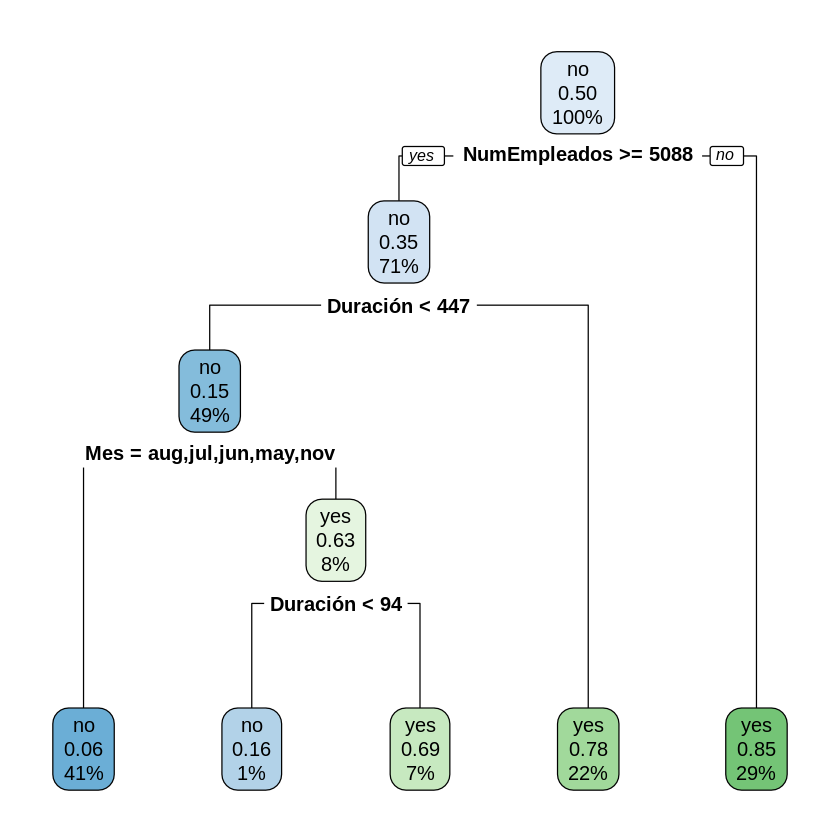

In [ ]:
library(caret)
library(rpart)
library(rpart.plot)

# Decision Tree
DT_model <- rpart(as.factor(OK) ~ ., data=training.data, method="class", minbucket=10)

DT_predictTraining <- predict(DT_model, training.data, type = "class")
DT_predictTesting <- predict(DT_model, testing.data, type = "class")
print("Resultados Árbol de Decisión")
confusionMatrix(DT_predictTraining, as.factor(training.data$OK)) 
confusionMatrix(DT_predictTesting, as.factor(testing.data$OK)) 
rpart.plot(DT_model)


**Random Forest**

In [ ]:
library(randomForest)
library(caret)

# Random Forest
RF_model <- randomForest(as.factor(OK) ~ ., data=training.data, method="class")
RF_predict <- predict(RF_model, testing.data, type = "class")
confusionMatrix(RF_predict, as.factor(testing.data$OK))

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




Confusion Matrix and Statistics

          Reference
Prediction   no  yes
       no   957  100
       yes  187 1072
                                         
               Accuracy : 0.8761         
                 95% CI : (0.862, 0.8892)
    No Information Rate : 0.506          
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.7519         
                                         
 Mcnemar's Test P-Value : 3.846e-07      
                                         
            Sensitivity : 0.8365         
            Specificity : 0.9147         
         Pos Pred Value : 0.9054         
         Neg Pred Value : 0.8515         
             Prevalence : 0.4940         
         Detection Rate : 0.4132         
   Detection Prevalence : 0.4564         
      Balanced Accuracy : 0.8756         
                                         
       'Positive' Class : no             
                                         

**Naive Bayes**

In [ ]:
library(e1071) 

# Naive Bayes
NB_model <- naiveBayes(as.factor(OK) ~ ., data=training.data)
NB_predict <- predict(NB_model, testing.data, type = "class")
confusionMatrix(NB_predict, as.factor(testing.data$OK)) 

**Red Neuronal**

In [ ]:
library(nnet) 

# Red Neuronal
# Nótese que sólo se usan algunos atributos
NN_model <- nnet(as.factor(OK) ~ Edad+Ocupación+EstadoCivil+Educación+Duración+NumContactos+EmpTasaVar+Euribor3m+NumEmpleados,
                  data=training.data, size=30, maxit=3000)
NN_predict <- predict(NN_model, testing.data, type="class")

# A continuación se muestra el resultado de evaluación 
confTable <- table(NN_predict, testing.data$OK)
confTable

accuracy <- (confTable[1,1] + confTable[2,2]) / dim(testing.data)[1]
accuracy

sensitivity <- confTable[1,1] / (confTable[1,1] + confTable[1,2])
sensitivity

specificity <- confTable[2,2] / (confTable[2,1] + confTable[2,2])
specificity


---

**Complemento: Ejercicio de comprobación manual**


Para verificar que alguno de los modelos realmente predice correctamente, se comprueba con los datos de una persona en particular, pidiendo la predicción al modelo. A continuación hay dos ejemplo, que se puede modificar para ver su resultado, cambiando valores y también, cambiando el modelo a utilizar en la predicción. No se necesita modificar, ni comentar esta parte en la entrega.

In [ ]:
# Ejemplo 1: La predicción debería ser "YES"
sample_x <- clean.subdata[1,]
sample_x[1,1] <- 32       # Edad
sample_x[1,2] <- 'admin.' # Ocupación
sample_x[1,3] <- 'single' # EstadoCivil
sample_x[1,4] <- 'university.degree'  # Educación
sample_x

prediction <- predict(RF_model, sample_x)
prediction


# Ejemplo 2: La predicción debería ser "NO"
sample_x2 <- clean.subdata[1,]
sample_x2[1,1] <- 42
sample_x2[1,11] <- 600   # Duración
sample_x2[1,19] <- 2000  # NumEmpleados 
sample_x2

prediction <- predict(RF_model, sample_x2)
prediction
